In [1]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./dataset-0506"]).decode("utf8")) #check the files available in the directory

fields.pdf
submit_test.csv
test.csv
train.csv



In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe
train = pd.read_csv('./dataset-0506/train.csv')
test = pd.read_csv('./dataset-0506/test.csv')
print(train.shape,'->',test.shape)

(60000, 235) -> (10000, 234)


In [3]:
##display the first five rows of the train dataset.
train.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,nan,...,58,1,157,1,2483,1,6011,1,34.470,647603.770
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,nan,...,28,1,115,1,15872,1,32221,1,40.074,3321452.000
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,nan,...,78,1,212,1,15760,1,32228,1,54.462,9570885.316
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,nan,...,20,1,125,1,2568,1,7271,1,99.629,14215011.127
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,nan,...,18,1,47,1,2587,1,7442,1,124.131,762711.976


In [4]:
##display the first five rows of the test dataset.
test.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,nan,...,7,21,1,129,1,3991,1,8409,1,105.462
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,nan,...,18,44,1,67,1,1950,1,10725,1,100.820
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,nan,...,0,3,1,35,1,3707,1,19459,1,259.801
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,nan,...,16,60,1,144,1,6487,1,29400,1,22.942
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,nan,...,4,18,1,76,1,1346,1,3280,1,181.213


**Save and Remove Building ID**

In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
#Save the 'building_id' column
train_ID = train['building_id']
test_ID = test['building_id']

#Now drop the  'building_id' colum since it's unnecessary for  the prediction process.
train.drop("building_id", axis = 1, inplace = True)
test.drop("building_id", axis = 1, inplace = True)

#check again the data size after dropping the 'building_id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (60000, 235) 
The test data size before dropping Id feature is : (10000, 234) 

The train data size after dropping Id feature is : (60000, 234) 
The test data size after dropping Id feature is : (10000, 233) 


# Data Preprocess

## target variable process
**Log-transformation of the target variable**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12937270.81 and sigma = 55224170.14



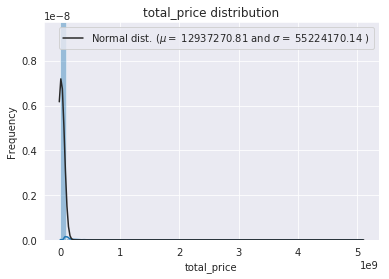

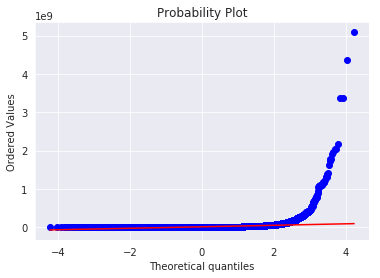

In [6]:
sns.distplot(train['total_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['total_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['total_price'], plot=plt)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 15.52 and sigma = 1.17



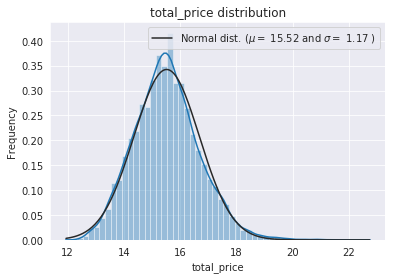

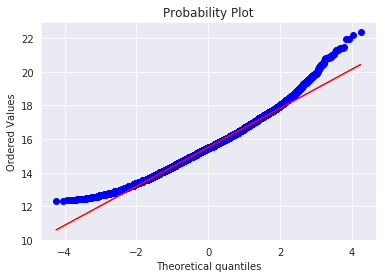

In [7]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["total_price"] = np.log1p(train["total_price"])

#Check the new distribution 
sns.distplot(train['total_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['total_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['total_price'], plot=plt)
plt.show()

# 特徵工程 Features engineering

In [8]:
# concatenate the train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['total_price'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['total_price'], axis=1, inplace=True)
print(f"all_data size is : {all_data.shape}, y_train size: {y_train.shape}")

all_data size is : (70000, 233), y_train size: (60000,)


In [9]:
# txn_dt - building_complete_dt
all_data['building_age'] = (all_data['txn_dt'] - all_data['building_complete_dt'])
all_data.head(5)

,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,III_index_1000,...,total_floor,town,town_area,town_population,town_population_density,txn_dt,txn_floor,village,village_income_median,building_age
0,0,3,91,3728,17,1,37,1861,42.636,1,...,4,334,1.416,24219.000,17103.000,18674,3.000,3132,572.000,12403
1,1,1,29,7380,4,1,11,2512,7.157,1,...,5,180,23.137,551480.000,23835.000,18800,5.000,921,550.000,10915
2,0,1,235,7971,17,0,73,2695,86.589,1,...,4,180,23.137,551480.000,23835.000,19289,1.000,1544,625.000,13261
3,0,1,50,3904,3,1,5,2157,45.509,1,...,24,343,14.752,139259.000,9440.000,20385,13.000,3350,950.000,2060
4,0,0,1,1449,0,0,0,134,546.048,1,...,2,102,71.040,112397.000,1582.000,20657,nan,63,536.000,13777


**Data Correlation**

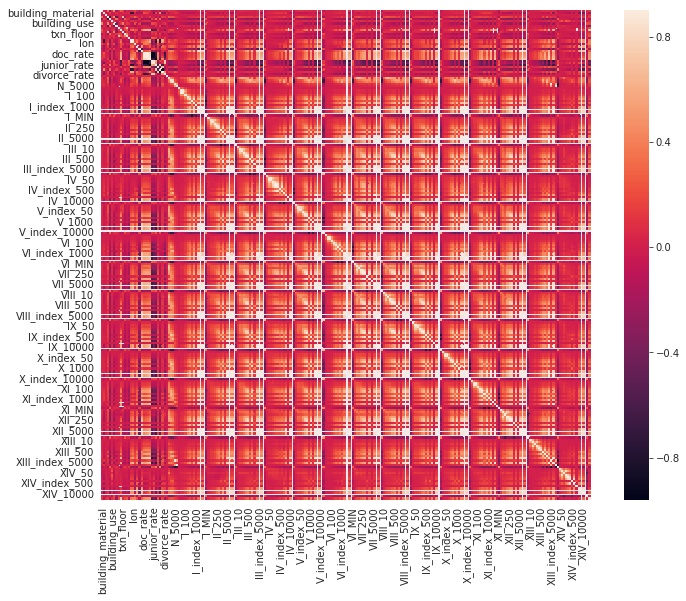

In [10]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
# building_material 建材
# building_use 建物用途
# txn_floor 交易樓層
# lon 建物經度
# doc_rate 博士教育程度人口占比
# junior_rate 所在縣市國中教育程度人口占比

## 填補缺失值

In [11]:
# figure all missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
# missing features
# parking_area    94% 車位面積
# parking_price   76% 車位價格
# txn_floor       26% 交易樓層
# village_income_median 1.89% 里年收入中位數

,Missing Ratio
parking_area,94.853
parking_price,76.821
txn_floor,26.487
village_income_median,1.894


In [12]:
# Handle Missing Features parking_area
all_data["parking_area"] = all_data["parking_area"].fillna(0)

In [13]:
all_data["parking_price"] = all_data["parking_price"].fillna(0)

In [14]:
# all_data["txn_floor"] = all_data["txn_floor"].fillna(0)

In [15]:
# all_data["village_income_median"] = all_data["village_income_median"].fillna(0)

## 數值型特徵
**去離群值**
**去偏態**
**特徵縮放**

## 類別型特徵
**類別型特徵處理理**

In [ ]:
# 

## 時間型特徵
**時間特徵分解**
**週期循環特徵**